# エスカレーター並び方問題のシミュレーション

(Version 0.0.1)

## 概要

エスカレーター。安全性を捨象すれば、二列並びより一列並び(片側空け)のほうが効率的である。電車から降りて改札に向かうような有限人数の状況を考える。スピードを重視する者と楽さを重視する者がいるとする。全体が半々か前者のほうが多いと、高速レーンがある分、一列並びのほうが、全体が速くはける。後者のほうが多い場合、全体がはけるのは遅くなるが、楽さを重視する者はスピードが遅くなることを気にせず、スピードを重視する者はスピードが出せることから、全体満足度は一列並びのほうが高くなると思われる。楽さを重視する者のスピードへの評価はほぼ無視できる。なぜなら、もし途中からスピードが気になりだしたら、スピード重視派に変わって高速レーンを使っただろうから。

これを Gemini 2.5 Flash (with Canvas) さんの協力のもとシミュレーションで検証する。

## 構想

エスカレーターで立ち止まって二列に並ぶ(二列並び)か、一列を高速レーンとして空けてそこは歩いて上がるとし、もう一列に立ち止まって並ぶ(一列並び＝片側空け)かが日常において問題となっている。安全性を考えると二列並びが良いのだが、人々は効率を考えてか一列並びを選択することが多い。ここでは、安全性については捨象して、実際一列並びは効率的なのかを探りたい。

電車から降りてエスカレーターで改札に上がる状況をとらえる。つまり人数は有限。

スピードと楽さという二つのパラメータがあり、その評価のしかたが人によって違う場合で、累積満足度をはかると、一列並びのほうが満足度が高い(場合がある)と思われる。スピードを優先する人がスピードを上げられることは社会全体の効率にも寄与するはずである。…それはそれとして。

楽さについて。二列並びでも一列並びでも、エスカレータの楽さは変わらず、スピードを評価しない者にとってはどちらも同じことであろうから、スピードに対する評価のみを見ればいいのかもしれない。

実際の効率(全体がはける時間)について。二列並びはやってきた順にほぼ乗るしかないが、一列並びは、最適配置を目指すことができるとできる。エスカレーターに乗る前の順番で二列並びも誰が先にエスカレーターで上がるかで最適化の余地はあるけれども、一列並びの場合は、それに加えて高速レーンを使うかどうかで最適化できる。

これだけで、二列並びよりも一列並びのほうが列全体が上がり切るのが速い場合があるだろう。さらに、スピードを重視しない者の列消化について(満足度評価を)打ち切れば、一列並びのほうが相当高速に上がり切ったと評価できるだろう。

ランダム到着モデルの場合、楽さをスピードより重視する者が多ければ、総時間は一列並びのほうが長くなることはある。しかし、その場合も、満足度を考えると、楽さを重視する者が列に残り、スピードを重視する者はすぐにはけるので、一列並びのほうが大きいと思われる。(ただし、ランダム到着モデルといっても、ポアソン分布の到着時間…とかいう意味ではなく、単にスピード重視派と楽さ重視派のどちらが来るかがランダムということである。)

二列並びに「急かされる」効果は無視して良いだろう。そういう人は、列形成が終わった後に、遅れていけばいいだけだから。


## 結論

一列並びのほうが、スピード重視派が多い場合は全体がはける時間も早く、楽さ重視派が多い場合も満足度は上であることがだいたい示せた。

しかし、《[エスカレーターでの効率のいい乗りかたについてー片側空けがもたらすこと―](https://www.udescalator.co.jp/post/%E3%82%A8%E3%82%B9%E3%82%AB%E3%83%AC%E3%83%BC%E3%82%BF%E3%83%BC%E3%81%A7%E3%81%AE%E5%8A%B9%E7%8E%87%E3%81%AE%E3%81%84%E3%81%84%E4%B9%97%E3%82%8A%E3%81%8B%E3%81%9F%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6%E3%83%BC%E7%89%87%E5%81%B4%E7%A9%BA%E3%81%91%E3%81%8C%E3%82%82%E3%81%9F%E3%82%89%E3%81%99%E3%81%93%E3%81%A8%E2%80%95)》に書かれている通り、全体がはける時間では一列並びが不利になることがあり、さらに、高速レーンを使う者が、歩くスピードが遅かったり安全マージンを大きく取らなければならない場合では、スピード重視派が半々より多い場合でも、全体がはける時間が一列並びのほうが不利になることがわかった。全体満足度についても一列並びが負けうることが示された。


## 会話

Gemini 2.5 Flash さんとの会話は↓に公開してある。ただ、今のところ Canvas のプログラムが見えない…とかがあるようだ。

https://g.co/gemini/share/c5ae753fea85


## ライセンス

基本的に「簡単なプログラムなので Public Domain でいいです。ただし、それだと使いにくいという場合は MIT License で。」でよい。ただし、私が作った部分についてはそれでいいが、問題は、AI さんが作った部分をどう評価するか…。


## 実験1

コードは Gemini 2.5 Flash さんがだいたい作った。最初は私の命題を検証できるようプログラムを組んでもらった。途中、小数点がらみのバグを取ったりしたので私の力も結構入っている。一列並びの際、高速レーンが埋まっているときに非高速レーンを使うというロジックは複雑でなかなか Gemini さんに指示して組み込むのが難しかったが、こうしないと、一列並びが有利なようにはならない。そういう複雑なロジックのため、エスカレーターに入る前の列形成はランダム到着というよりは最適配置に近くなっている。完全な最適配置ではないが。

また ESCALATOR_SPEED = 0.2 のように遅く設定することも大事である。Gemini さんは最初に ESCALATOR_SPEED = 1.0 のコードを示したのだが、それだと、スピード重視派がいかに早く駆け抜けても、escalator[0] に必ず空きがあるためスピード重視派がそれよりすばやく列を埋めることができなくなるから、一列並びが有効にならないのだ。

全体満足度は、Gemini さんはいろいろ考えてくれたが、結局、スピード重視派の滞在時間の合計のマイナスで示すことにした。

あとはコードを読んでいただければ、だいたいわかると思う。(思いたい。)

実際のコードの前に、まず、Matplotlibで日本語を表示するためにライブラリをインストールしておく。


In [1]:
!pip install japanize-matplotlib

次にメインのコード。


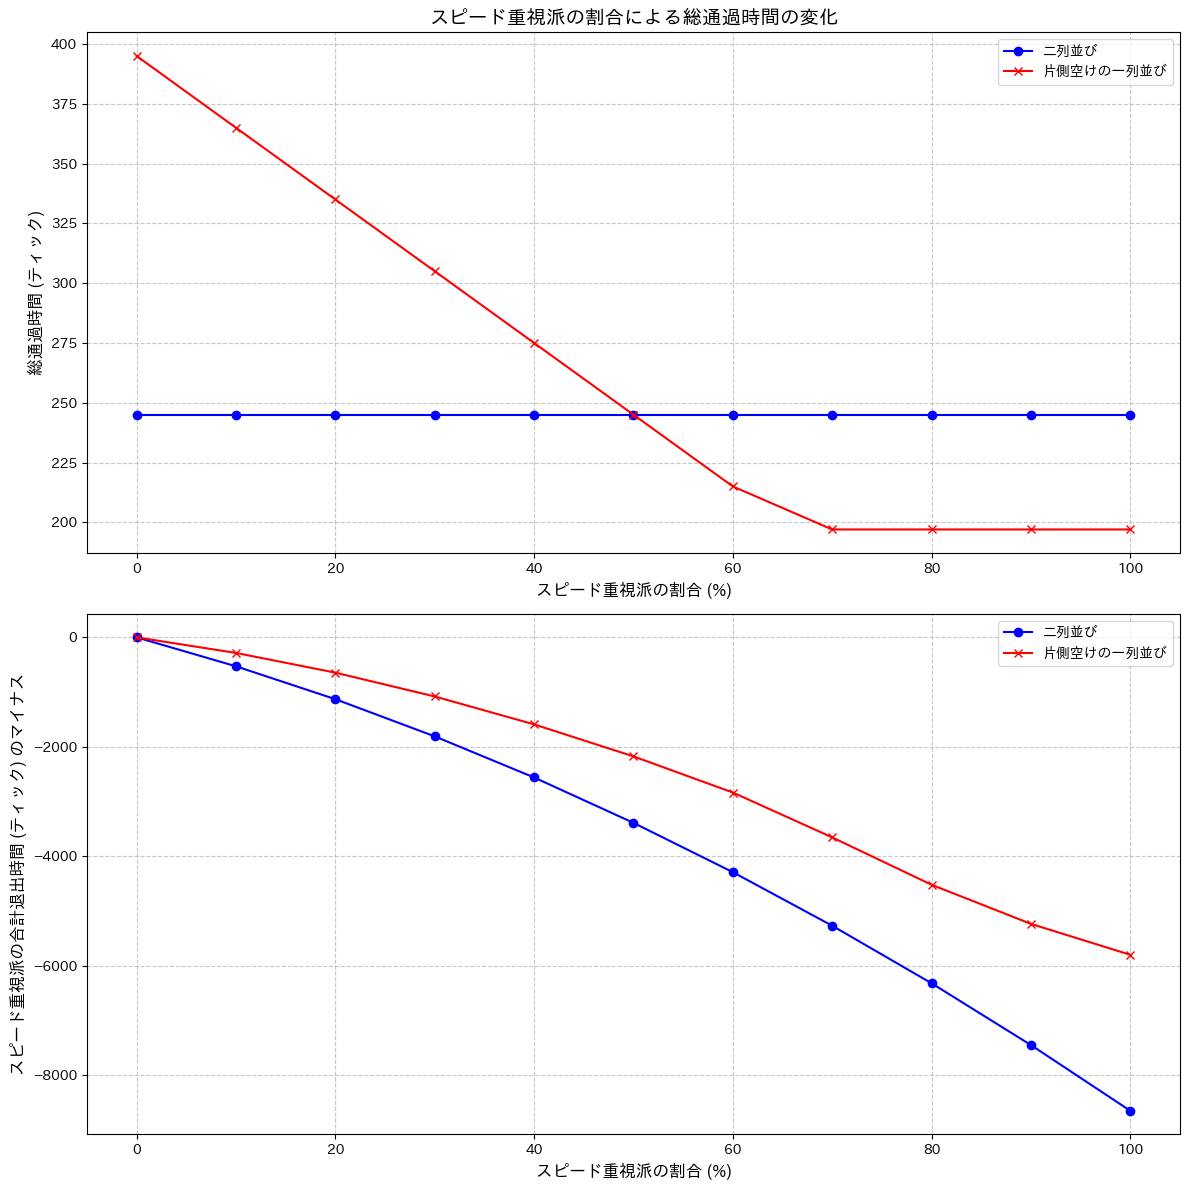


--- シミュレーション完了 ---
総人数: 50人
エスカレーターの長さ: 20ステップ
エスカレーターの速度: 0.2ステップ/ティック
歩行速度倍率: 2.0倍
各割合でのシミュレーション回数: 1回

**結果の概要**
「総通過時間の変化」グラフは、エスカレーターを全員が通過するまでにかかる時間の平均値を示します。
「スピード重視派の合計退出時間 (ティック) のマイナス」グラフは、全体満足度を示します。


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントの設定 (Matplotlibで日本語を表示するため)
import japanize_matplotlib

# 人を表すクラス
class Person:
    def __init__(self, id, type):
        """
        個人の初期化
        :param id: 個人の識別子
        :param type: 'speed' (スピード重視) または 'comfort' (楽さ重視)
        """
        self.id = id
        self.type = type
        self.current_position = 0.0 # エスカレーター上の現在の位置
                                    # (浮動小数点数で精度を保つ)
        self.entry_tick = None # エスカレーターに乗ったティック
        self.exit_tick = None  # エスカレーターを降りたティック

def run_simulation(scenario_type, num_people,
                   speed_focused_percentage, escalator_length,
                   escalator_speed, walking_speed_multiplier):
    """
    エスカレーターシミュレーションを実行するメイン関数
    :param scenario_type: 'double' (二列並び)
                          または 'single' (片側空けの一列並び)
    :param num_people: 総人数
    :param speed_focused_percentage: スピード重視派の割合 (%)
    :param escalator_length: エスカレーターの長さ (ステップ数)
    :param escalator_speed: エスカレーターの速度 (ステップ/ティック)
    :param walking_speed_multiplier: 歩行速度倍率
    :return: シミュレーション結果 (辞書)
    """
    # スピード重視派と楽さ重視派の人数を正確に計算
    # 端数は楽さ重視派で調整
    num_speed_focused = int(num_people * speed_focused_percentage / 100)
    num_comfort_focused = num_people - num_speed_focused

    people_list = []
    for i in range(num_speed_focused):
        people_list.append(Person(i, 'speed'))
    for i in range(num_speed_focused, num_people):
        people_list.append(Person(i, 'comfort'))
    random.shuffle(people_list) # キューに入れる前にシャッフルして
                                # 順序をランダムにする

    # 人々のキューを初期化
    speed_queue = [p for p in people_list if p.type == 'speed']
    comfort_queue = [p for p in people_list if p.type == 'comfort']

    # エスカレーターのレーンを初期化 (Noneで空きを表す)
    # レーン0: 立ち止まる人 (または二列並び時の左レーン)
    # レーン1: 歩く人 (または二列並び時の右レーン)
    escalator = [
        [None] * escalator_length, # レーン0
        [None] * escalator_length  # レーン1
    ]

    time = 0 # 経過時間 (ティック数)
    exited_count = 0 # エスカレーターを降りた人数

    # 結果を格納する辞書
    results = {
        'total_time': 0,
        'speed_walked': 0, # スピード重視派で歩けた人数 (片側空けのみ)
        'comfort_stood': 0, # 楽さ重視派で立ち止まれた人数 (片側空けのみ)
        'speed_used_comfort_lane_count': 0, # スピード重視派で、楽さ重視派レーン
                                            # を使った人数 (片側空けのみ)
        'speed_waited': 0, # スピード重視派で、希望のレーンが空くのを待った回数
        'comfort_waited': 0, # 楽さ重視派で、希望のレーンが空くのを待った回数
        'overall_satisfaction': 0,
        'total_speed_focused_people': num_speed_focused,
        'total_comfort_focused_people': num_comfort_focused
    }

    MAX_TICKS = 200000 # 無限ループ防止のための最大ティック数

    # 全員がエスカレーターを降りるか、最大ティック数に達するまで
    # シミュレーションを続ける
    while exited_count < num_people and time < MAX_TICKS:
        time += 1 # 1ティック進める

        # 移動後のエスカレーターの状態を一時的に保持する配列
        people_on_escalator_next_tick = [
            [None] * escalator_length,
            [None] * escalator_length
        ]

        # 1. エスカレーター上の人々を移動させる
        # エスカレーターの終点から起点へ逆順に処理することで、
        # 衝突解決を一貫して行う
        for l in range(2): # 各レーンについて
            # 終点から起点へ逆順に処理
            for pos_idx in range(escalator_length - 1, -1, -1):
                current_person = escalator[l][pos_idx]
                if current_person:
                    # 移動速度を決定
                    speed = escalator_speed
                    # 片側空けで歩くレーン
                    if scenario_type == 'single' and l == 1:
                        speed = escalator_speed * walking_speed_multiplier

                    # 潜在的な新しい浮動小数点位置を計算
                    potential_new_pos_float = current_person.current_position \
                        + speed

                    # 終了条件の頑健な浮動小数点比較のためにイプシロンを使用
                    if potential_new_pos_float >= escalator_length - 1e-9:
                        # エスカレーターを降りた
                        exited_count += 1
                        current_person.exit_tick = time # 降りたティックを記録
                        # 希望のモードが達成されたか記録
                        # (片側空けの場合のみ意味がある)
                        if scenario_type == 'single':
                            if current_person.type == 'speed' and l == 1:
                                results['speed_walked'] += 1
                            elif current_person.type == 'comfort' and l == 0:
                                results['comfort_stood'] += 1
                    else:
                        # 新しい整数ステップに移動を試みる
                        target_int_pos = min(escalator_length - 1,
                                             int(potential_new_pos_float))

                        # 衝突チェック: 新しいエスカレーターの目標位置が
                        # すでに占有されている場合、
                        # その人はこのティックでその位置に移動できない。
                        # 現在の整数ステップに留まる。
                        if people_on_escalator_next_tick[l][target_int_pos]\
                           is None:
                            people_on_escalator_next_tick[l][target_int_pos]\
                                = current_person
                            # 移動した場合のみ浮動小数点位置を更新
                            current_person.current_position\
                                = potential_new_pos_float
                        else:
                            # 衝突: その人はこのティックで現在の整数ステップに
                            # 留まる。
                            # 浮動小数点位置は更新されない。
                            # その人が現在の位置に留まることを保証するために、
                            # 新しいエスカレーターに配置する。
                            if people_on_escalator_next_tick[l][pos_idx]\
                               is None:
                                people_on_escalator_next_tick[l][pos_idx]\
                                    = current_person

        # エスカレーターの状態を、正常に移動した人々で更新
        escalator = people_on_escalator_next_tick

        # 2. 待機中の人々をエスカレーターに乗せる (起点0に配置)
        if scenario_type == 'double': # 二列並びの場合
            # レーン0に空きがあり、待機中の人がいる場合
            if escalator[0][0] is None:
                if speed_queue:
                    person = speed_queue.pop(0)
                    escalator[0][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                elif comfort_queue:
                    person = comfort_queue.pop(0)
                    escalator[0][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
            # レーン1に空きがあり、待機中の人がいる場合
            if escalator[1][0] is None:
                if speed_queue:
                    person = speed_queue.pop(0)
                    escalator[1][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                elif comfort_queue:
                    person = comfort_queue.pop(0)
                    escalator[1][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
        else: # 片側空けの一列並びの場合
            # このティックで各レーンに乗る人を決定
            person_for_lane0 = None
            person_for_lane1 = None

            # 優先度1: レーン0に楽さ重視派
            if escalator[0][0] is None and comfort_queue:
                person_for_lane0 = comfort_queue.pop(0)

            # 優先度2: レーン1にスピード重視派
            if escalator[1][0] is None and speed_queue:
                person_for_lane1 = speed_queue.pop(0)

            # 優先度3: スピード重視派がレーン0にフォールバック
            # スピード重視派がまだ待機中で、かつ
            # レーン0がまだ空いており
            # (このティックで楽さ重視派が乗車しなかった場合も含む)、かつ
            # 楽さ重視派のキューが完全に空になった後 (全員が乗り終えた後)
            if speed_queue and escalator[0][0] is None\
               and person_for_lane0 is None and not comfort_queue:
                person_for_lane0 = speed_queue.pop(0)
                results['speed_used_comfort_lane_count'] += 1

            # 決定に基づいて乗車を実行
            if person_for_lane0:
                escalator[0][0] = person_for_lane0
                person_for_lane0.current_position = 0.0
                person_for_lane0.entry_tick = time # 乗ったティックを記録
            if person_for_lane1:
                escalator[1][0] = person_for_lane1
                person_for_lane1.current_position = 0.0
                person_for_lane1.entry_tick = time # 乗ったティックを記録

            # 待機中の人数をカウント
            # 各キューに残っている場合のみ待機中とみなす
            if speed_queue: # スピード重視派がまだキューに残っている場合
                results['speed_waited'] += 1
            if comfort_queue: # 楽さ重視派がまだキューに残っている場合
                results['comfort_waited'] += 1

    results['total_time'] = time # シミュレーションにかかった総ティック数

    if time >= MAX_TICKS:
        print(f"警告: シミュレーションが最大ティック数 ({MAX_TICKS}) に"
              + "達しましたが、全員がエスカレーターを降りていません。"
              "デッドロックまたは非常に遅い進行の可能性があります。")


    # 全体満足度を計算 (スピード重視派の合計退出時間のマイナス)
    speed_focused_total_exit_time = 0
    for person in people_list:
        if person.type == 'speed' and person.exit_tick is not None:
            speed_focused_total_exit_time += person.exit_tick

    # 合計時間が短いほど「満足度が高い」ので、マイナス値で表現
    results['overall_satisfaction'] = -speed_focused_total_exit_time

    return results

def run_multiple_simulations_and_collect_results(
    num_people, escalator_length, escalator_speed, walking_speed_multiplier,
    num_simulations_per_percentage, speed_focused_percentages
):
    """
    異なるスピード重視派の割合で複数のシミュレーションを実行し、結果を収集する関数
    :param num_people: 総人数
    :param escalator_length: エスカレーターの長さ
    :param escalator_speed: エスカレーターの速度
    :param walking_speed_multiplier: 歩行速度倍率
    :param num_simulations_per_percentage: 各割合で実行するシミュレーション回数
    :param speed_focused_percentages: シミュレーションするスピード重視派の
                                      割合のリスト
    :return: 二列並びと片側空けの一列並びのシナリオの結果リストのタプル
             (double_file_times, double_file_satisfactions,
              single_file_times, single_file_satisfactions)
    """
    double_file_times = []
    double_file_satisfactions = []
    single_file_times = []
    single_file_satisfactions = []

    for percentage in speed_focused_percentages:
        current_double_times = []
        current_double_satisfactions = []
        current_single_times = []
        current_single_satisfactions = []

        for _ in range(num_simulations_per_percentage):
            # 二列並びシミュレーションを実行
            double_results = run_simulation(
                'double', num_people, percentage, escalator_length,
                escalator_speed, walking_speed_multiplier
            )
            current_double_times.append(double_results['total_time'])
            current_double_satisfactions.append(
                double_results['overall_satisfaction']
            )

            # 片側空けの一列並びシミュレーションを実行
            single_results = run_simulation(
                'single', num_people, percentage, escalator_length,
                escalator_speed, walking_speed_multiplier
            )
            current_single_times.append(single_results['total_time'])
            current_single_satisfactions.append(
                single_results['overall_satisfaction']
            )

        # 平均値を計算して格納 (SEMは削除)
        double_file_times.append({
            'mean': np.mean(current_double_times)
        })
        double_file_satisfactions.append({
            'mean': np.mean(current_double_satisfactions)
        })
        single_file_times.append({
            'mean': np.mean(current_single_times)
        })
        single_file_satisfactions.append({
            'mean': np.mean(current_single_satisfactions)
        })

    return double_file_times, double_file_satisfactions, \
        single_file_times, single_file_satisfactions


def plot_simulation_results(speed_focused_percentages, double_file_times,
                            double_file_satisfactions,
                            single_file_times, single_file_satisfactions,
                            num_people, escalator_length, escalator_speed,
                            walking_speed_multiplier,
                            num_simulations_per_percentage):
    """
    シミュレーション結果をグラフに描画する関数
    :param speed_focused_percentages: スピード重視派の割合のリスト
    :param double_file_times: 二列並びの総通過時間の結果リスト (平均のみ)
    :param double_file_satisfactions: 二列並びの全体満足度の結果リスト
                                      (平均のみ)
    :param single_file_times: 片側空けの一列並びの総通過時間の結果リスト
                              (平均のみ)
    :param single_file_satisfactions: 片側空けの一列並びの全体満足度の
                                      結果リスト (平均のみ)
    :param num_people: 総人数
    :param escalator_length: エスカレーターの長さ
    :param escalator_speed: エスカレーターの速度
    :param walking_speed_multiplier: 歩行速度倍率
    :param num_simulations_per_percentage: 各割合でのシミュレーション回数
    """
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # グラフ1: 全体がはける時間 (総通過時間) の変化
    ax1 = axes[0]
    double_means_time = [d['mean'] for d in double_file_times]
    single_means_time = [d['mean'] for d in single_file_times]

    ax1.plot(speed_focused_percentages, double_means_time,
             label='二列並び', color='blue', marker='o')
    ax1.plot(speed_focused_percentages, single_means_time,
             label='片側空けの一列並び', color='red', marker='x')

    ax1.set_xlabel('スピード重視派の割合 (%)', fontsize=12)
    ax1.set_ylabel('総通過時間 (ティック)', fontsize=12)
    ax1.set_title('スピード重視派の割合による総通過時間の変化', fontsize=14)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # グラフ2: 全体満足度 の変化
    ax2 = axes[1]
    double_means_satisfaction = [d['mean'] for d in double_file_satisfactions]
    single_means_satisfaction = [d['mean'] for d in single_file_satisfactions]

    ax2.plot(speed_focused_percentages, double_means_satisfaction,
             label='二列並び', color='blue', marker='o')
    ax2.plot(speed_focused_percentages, single_means_satisfaction,
             label='片側空けの一列並び', color='red', marker='x')

    ax2.set_xlabel('スピード重視派の割合 (%)', fontsize=12)
    ax2.set_ylabel('スピード重視派の合計退出時間 (ティック) のマイナス',
                   fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout() # レイアウトの調整
    plt.show() # グラフを表示

    print("\n--- シミュレーション完了 ---")
    print(f"総人数: {num_people}人")
    print(f"エスカレーターの長さ: {escalator_length}ステップ")
    print(f"エスカレーターの速度: {escalator_speed}ステップ/ティック")
    print(f"歩行速度倍率: {walking_speed_multiplier}倍")
    print(f"各割合でのシミュレーション回数: {num_simulations_per_percentage}回")

    print("\n**結果の概要**")
    print("「総通過時間の変化」グラフは、エスカレーターを"
          + "全員が通過するまでにかかる時間の平均値を示します。")
    print("「スピード重視派の合計退出時間 (ティック) のマイナス」グラフは、"
          + "全体満足度を示します。")

# シミュレーションパラメータ
NUM_PEOPLE = 50
ESCALATOR_LENGTH = 20
ESCALATOR_SPEED = 0.2
WALKING_SPEED_MULTIPLIER = 2.0
NUM_SIMULATIONS_PER_PERCENTAGE = 1 # 各割合で実行するシミュレーション回数1

# スピード重視派の割合の範囲
speed_focused_percentages = np.arange(0, 101, 10)

# 複数シミュレーションを実行し、結果を収集
double_file_times, double_file_satisfactions, \
    single_file_times, single_file_satisfactions = \
    run_multiple_simulations_and_collect_results(
        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED, WALKING_SPEED_MULTIPLIER,
        NUM_SIMULATIONS_PER_PERCENTAGE, speed_focused_percentages
    )

# シミュレーション結果をプロット
plot_simulation_results(speed_focused_percentages, double_file_times,
                        double_file_satisfactions,
                        single_file_times, single_file_satisfactions,
                        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED,
                        WALKING_SPEED_MULTIPLIER,
                        NUM_SIMULATIONS_PER_PERCENTAGE)


このように、一列並びのほうが、常に全体満足度が高く、スピード重視派が少なくなれば全体がはける時間でも効率的であることが示された。


## 実験2

↓では、二列並びのほうが効率的だという。

《エスカレーターでの効率のいい乗りかたについてー片側空けがもたらすこと―》  
https://www.udescalator.co.jp/post/%E3%82%A8%E3%82%B9%E3%82%AB%E3%83%AC%E3%83%BC%E3%82%BF%E3%83%BC%E3%81%A7%E3%81%AE%E5%8A%B9%E7%8E%87%E3%81%AE%E3%81%84%E3%81%84%E4%B9%97%E3%82%8A%E3%81%8B%E3%81%9F%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6%E3%83%BC%E7%89%87%E5%81%B4%E7%A9%BA%E3%81%91%E3%81%8C%E3%82%82%E3%81%9F%E3%82%89%E3%81%99%E3%81%93%E3%81%A8%E2%80%95

全体がはける時間については、一列並びが不利になりうることは、実験1でも認めて示したところである。しかし、それだけでなく、↑では、高速レーンを歩く者については、安全マージンを取って2段空けて乗るという設定にし、それで高速レーンが埋まりやすい状況を作って、それも非効率性につながるとしていた。

実験2ではそれを試そう。もちろん、プログラムは Gemini 2.5 Flash さんにに作ってもらった。変更点は、walking_lane_entry_interval_ticks などを考慮するようになったことである。

私の貢献は、walking_speed_multiplier を考慮して、effective_walking_lane_entry_interval_ticks で測らねばならないということに気付いたところである。つまり、高速レーンを「一定時間待つ」だけだと非高速レーンが有利になり過ぎる。仮に安全マージンがあっても高速レーンは高速で動くため待つ時間もそこまで多くなくていい…という効果を入れる必要があったのだ。

なお、ESCALATOR_SPEED = 0.2 のままなので、一段空ける STANDING_LANE_ENTRY_INTERVAL_TICKS は 1/0.2 = 5 に、二段空ける WALKING_LANE_ENTRY_INTERVAL_TICKS は 2/0.2 = 10 にまず設定する。


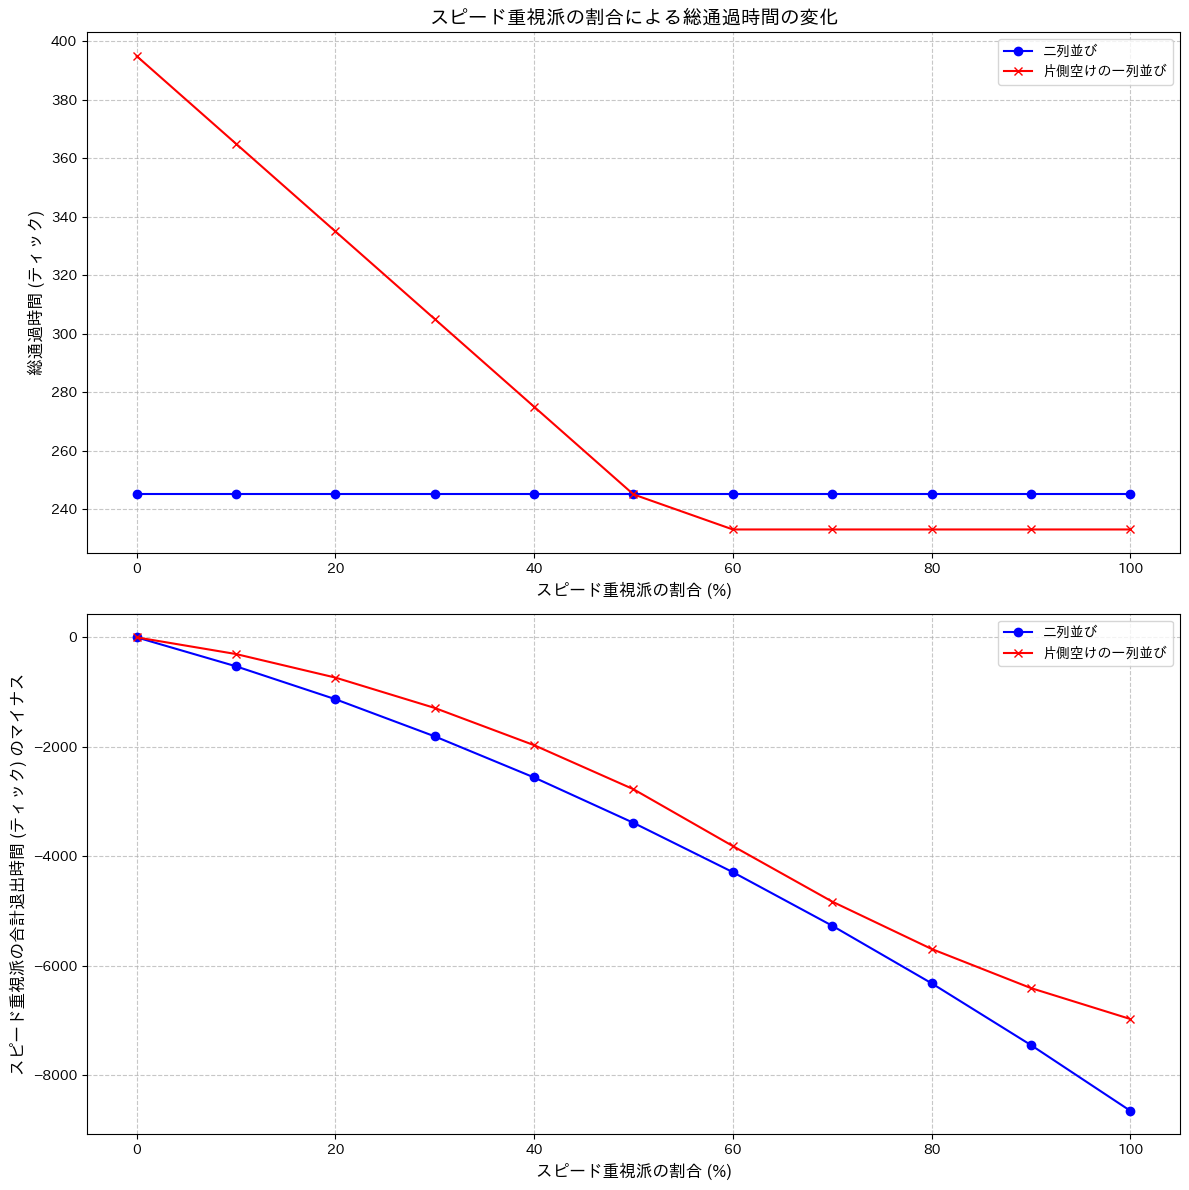


--- シミュレーション完了 ---
総人数: 50人
エスカレーターの長さ: 20ステップ
エスカレーターの速度: 0.2ステップ/ティック
歩行速度倍率: 2.0倍
立ち止まるレーンの乗車間隔: 5.0ティック
歩くレーンの乗車間隔: 10.0ティック (実効値: 5ティック)
各割合でのシミュレーション回数: 1回

**結果の概要**
「総通過時間の変化」グラフは、エスカレーターを全員が通過するまでにかかる時間の平均値を示します。
「スピード重視派の合計退出時間 (ティック) のマイナス」グラフは、全体満足度を示します。


In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントの設定 (Matplotlibで日本語を表示するため)
import japanize_matplotlib

# 人を表すクラス
class Person:
    def __init__(self, id, type):
        """
        個人の初期化
        :param id: 個人の識別子
        :param type: 'speed' (スピード重視) または 'comfort' (楽さ重視)
        """
        self.id = id
        self.type = type
        self.current_position = 0.0 # エスカレーター上の現在の位置
                                    # (浮動小数点数で精度を保つ)
        self.entry_tick = None # エスカレーターに乗ったティック
        self.exit_tick = None  # エスカレーターを降りたティック

def run_simulation(scenario_type, num_people, speed_focused_percentage,
                   escalator_length, escalator_speed, walking_speed_multiplier,
                   standing_lane_entry_interval_ticks,
                   walking_lane_entry_interval_ticks):
    """
    エスカレーターシミュレーションを実行するメイン関数
    :param scenario_type: 'double' (二列並び)
                          または 'single' (片側空けの一列並び)
    :param num_people: 総人数
    :param speed_focused_percentage: スピード重視派の割合 (%)
    :param escalator_length: エスカレーターの長さ (ステップ数)
    :param escalator_speed: エスカレーターの速度 (ステップ/ティック)
    :param walking_speed_multiplier: 歩行速度倍率
    :param comfort_satisfaction_weight:
        楽さ重視派の満足度が全体満足度に与える重み (0.0-1.0)
    :param standing_lane_entry_interval_ticks:
        立ち止まるレーンの乗車間隔 (ティック)
    :param walking_lane_entry_interval_ticks: 歩くレーンの乗車間隔 (ティック)
    :return: シミュレーション結果 (辞書)
    """
    # スピード重視派と楽さ重視派の人数を正確に計算
    # 端数は楽さ重視派で調整
    num_speed_focused = int(num_people * speed_focused_percentage / 100)
    num_comfort_focused = num_people - num_speed_focused

    people_list = [] # シミュレーション中の全人物を保持するリスト
    for i in range(num_speed_focused):
        people_list.append(Person(i, 'speed'))
    for i in range(num_speed_focused, num_people):
        people_list.append(Person(i, 'comfort'))
    # キューに入れる前にシャッフルして順序をランダムにする
    random.shuffle(people_list)

    # 人々のキューを初期化
    speed_queue = [p for p in people_list if p.type == 'speed']
    comfort_queue = [p for p in people_list if p.type == 'comfort']

    # エスカレーターのレーンを初期化 (Noneで空きを表す)
    # レーン0: 立ち止まる人 (または二列並び時の左レーン)
    # レーン1: 歩く人 (または二列並び時の右レーン)
    escalator = [
        [None] * escalator_length, # レーン0
        [None] * escalator_length  # レーン1
    ]

    time = 0 # 経過時間 (ティック数)
    exited_count = 0 # エスカレーターを降りた人数

    # 各レーンの最終乗車ティックを初期化 (初回はすぐに乗れるように負の無限大)
    last_board_tick_lane0 = -float('inf')
    last_board_tick_lane1 = -float('inf')

    # 結果を格納する辞書
    results = {
        'total_time': 0,
        'speed_walked': 0, # スピード重視派で歩けた人数 (片側空けのみ)
        'comfort_stood': 0, # 楽さ重視派で立ち止まれた人数 (片側空けのみ)
        'speed_used_comfort_lane_count': 0, # スピード重視派で、楽さ重視派"
                                            # レーンを使った人数 (片側空けのみ)
        'speed_waited': 0, # スピード重視派で、希望のレーンが空くのを待った回数
        'comfort_waited': 0, # 楽さ重視派で、希望のレーンが空くのを待った回数
        'overall_satisfaction': 0, # 新しい定義の全体満足度
        'total_speed_focused_people': num_speed_focused,
        'total_comfort_focused_people': num_comfort_focused
    }

    MAX_TICKS = 200000 # 無限ループ防止のための最大ティック数

    # 歩くレーンの実効乗車間隔を計算（歩行速度倍率によって短縮される）
    # ただし、最低1ティックは必要
    effective_walking_lane_entry_interval_ticks \
        = max(1, int(walking_lane_entry_interval_ticks
                     / walking_speed_multiplier))

    # 全員がエスカレーターを降りるか、
    # 最大ティック数に達するまでシミュレーションを続ける
    while exited_count < num_people and time < MAX_TICKS:
        time += 1 # 1ティック進める

        # 次のティックのエスカレーターの状態を初期化
        new_escalator_state = [
            [None] * escalator_length,
            [None] * escalator_length
        ]

        # 1. エスカレーター上の人々を移動させる
        # 移動を試みる人物のリストを作成 (元の位置も保持)
        # (person, original_lane, original_pos_idx)
        people_on_escalator_current_tick = []
        for l in range(2):
            for pos_idx in range(escalator_length):
                if escalator[l][pos_idx]:
                    people_on_escalator_current_tick.append(
                        (escalator[l][pos_idx], l, pos_idx)
                    )

        # エスカレーターの終点に近い人から優先して処理するためにソート
        # これにより、衝突が発生した場合、後ろの人が前の人の進路を妨げないよう
        # にする
        people_on_escalator_current_tick.sort(
            key=lambda x: x[0].current_position, reverse=True
        )

        for person, original_lane, original_pos_idx \
                in people_on_escalator_current_tick:
            # 移動速度を決定
            speed = escalator_speed
            # 片側空けで歩くレーン
            if scenario_type == 'single' and original_lane == 1:
                speed = escalator_speed * walking_speed_multiplier

            # 潜在的な新しい浮動小数点位置を計算
            potential_new_pos_float = person.current_position + speed

            # 終了条件の頑健な浮動小数点比較のためにイプシロンを使用
            if potential_new_pos_float >= escalator_length - 1e-9:
                # エスカレーターを降りた
                exited_count += 1
                person.exit_tick = time # 降りたティックを記録
                if scenario_type == 'single':
                    if person.type == 'speed' and original_lane == 1:
                        results['speed_walked'] += 1
                    elif person.type == 'comfort' and original_lane == 0:
                        results['comfort_stood'] += 1
            else:
                # 人が移動を試みる新しい整数ステップ
                target_int_pos = min(escalator_length - 1,
                                     int(potential_new_pos_float))

                # 目標位置が空の場合、その人を配置し、位置を更新
                if new_escalator_state[original_lane][target_int_pos] is None:
                    new_escalator_state[original_lane][target_int_pos] = person
                    person.current_position \
                        = potential_new_pos_float # 浮動小数点位置を更新
                else:
                    # 衝突: 目標位置が既に占有されている場合、その人は移動できない。
                    # その人は元の整数位置に留まる。
                    new_escalator_state[original_lane][original_pos_idx] \
                        = person

        # エスカレーターの状態を、正常に移動した人々で更新
        escalator = new_escalator_state

        # 2. 待機中の人々をエスカレーターに乗せる (起点0に配置)
        if scenario_type == 'double': # 二列並びの場合
            # レーン0に空きがあり、乗車間隔をクリアしている場合
            if escalator[0][0] is None \
               and (time - last_board_tick_lane0
                    >= standing_lane_entry_interval_ticks):
                if speed_queue:
                    person = speed_queue.pop(0)
                    escalator[0][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                    last_board_tick_lane0 = time # 最終乗車ティックを更新
                elif comfort_queue:
                    person = comfort_queue.pop(0)
                    escalator[0][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                    last_board_tick_lane0 = time # 最終乗車ティックを更新

            # レーン1に空きがあり、乗車間隔をクリアしている場合
            if escalator[1][0] is None \
               and (time - last_board_tick_lane1
                    >= standing_lane_entry_interval_ticks):
                # 二列並びでは両レーンとも立ち止まる間隔
                if speed_queue:
                    person = speed_queue.pop(0)
                    escalator[1][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                    last_board_tick_lane1 = time # 最終乗車ティックを更新
                elif comfort_queue:
                    person = comfort_queue.pop(0)
                    escalator[1][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                    last_board_tick_lane1 = time # 最終乗車ティックを更新
        else: # 片側空けの一列並びの場合
            # このティックで各レーンに乗る人を決定
            person_for_lane0 = None
            person_for_lane1 = None

            # 優先度1: レーン0に楽さ重視派 (乗車間隔を考慮)
            if escalator[0][0] is None and comfort_queue \
               and (time - last_board_tick_lane0
                    >= standing_lane_entry_interval_ticks):
                person_for_lane0 = comfort_queue.pop(0)
                person_for_lane0.entry_tick = time # 乗ったティックを記録
                last_board_tick_lane0 = time # 最終乗車ティックを更新

            # 優先度2: レーン1にスピード重視派 (乗車間隔を考慮)
            if escalator[1][0] is None and speed_queue \
               and (time - last_board_tick_lane1
                    >= effective_walking_lane_entry_interval_ticks):
                person_for_lane1 = speed_queue.pop(0)
                person_for_lane1.entry_tick = time # 乗ったティックを記録
                last_board_tick_lane1 = time # 最終乗車ティックを更新

            # 優先度3: スピード重視派がレーン0にフォールバック
            # (乗車間隔と楽さ重視派のキューが空であることを考慮)
            # スピード重視派がまだ待機中で、かつ
            # レーン0がまだ空いており (このティックで楽さ重視派が
            # 乗車しなかった場合も含む)、かつ
            # 楽さ重視派のキューが完全に空になった後 (全員が乗り終えた後)、かつ
            # レーン0の乗車間隔もクリアしている場合
            if speed_queue and escalator[0][0] is None \
               and person_for_lane0 is None and not comfort_queue \
               and (time - last_board_tick_lane0
                    >= standing_lane_entry_interval_ticks):
                person_for_lane0 = speed_queue.pop(0)
                results['speed_used_comfort_lane_count'] += 1
                person_for_lane0.entry_tick = time # 乗ったティックを記録
                last_board_tick_lane0 = time # 最終乗車ティックを更新

            # 決定に基づいて乗車を実行
            if person_for_lane0:
                escalator[0][0] = person_for_lane0
                person_for_lane0.current_position = 0.0
            if person_for_lane1:
                escalator[1][0] = person_for_lane1
                person_for_lane1.current_position = 0.0

            # 待機中の人数をカウント
            # 各キューに残っている場合のみ待機中とみなす
            if speed_queue: # スピード重視派がまだキューに残っている場合
                results['speed_waited'] += 1
            if comfort_queue: # 楽さ重視派がまだキューに残っている場合
                results['comfort_waited'] += 1

    results['total_time'] = time # シミュレーションにかかった総ティック数

    if time >= MAX_TICKS:
        print(f"警告: シミュレーションが最大ティック数 ({MAX_TICKS}) に"
              + "達しましたが、全員がエスカレーターを降りていません。"
              + "デッドロックまたは非常に遅い進行の可能性があります。")

    # 全体満足度を計算 (スピード重視派の合計退出時間のマイナス)
    speed_focused_total_exit_time = 0
    for person in people_list:
        if person.type == 'speed' and person.exit_tick is not None:
            speed_focused_total_exit_time += person.exit_tick

    # 合計時間が短いほど「満足度が高い」ので、マイナス値で表現
    results['overall_satisfaction'] = -speed_focused_total_exit_time

    return results

def run_multiple_simulations_and_collect_results(
        num_people, escalator_length, escalator_speed, walking_speed_multiplier,
        num_simulations_per_percentage,
        speed_focused_percentages,
        standing_lane_entry_interval_ticks,
        walking_lane_entry_interval_ticks
):
    """
    異なるスピード重視派の割合で複数のシミュレーションを実行し、結果を収集する関数
    :param num_people: 総人数
    :param escalator_length: エスカレーターの長さ
    :param escalator_speed: エスカレーターの速度
    :param walking_speed_multiplier: 歩行速度倍率
    :param num_simulations_per_percentage:
        各割合で実行するシミュレーション回数
    :param speed_focused_percentages:
        シミュレーションするスピード重視派の割合のリスト
    :param standing_lane_entry_interval_ticks:
        立ち止まるレーンの乗車間隔 (ティック)
    :param walking_lane_entry_interval_ticks: 歩くレーンの乗車間隔 (ティック)
    :return: 二列並びと片側空けの一列並びのシナリオの結果リストのタプル
             (double_file_times, double_file_satisfactions,
              single_file_times, single_file_satisfactions)
    """
    double_file_times = []
    double_file_satisfactions = []
    single_file_times = []
    single_file_satisfactions = []

    for percentage in speed_focused_percentages:
        current_double_times = []
        current_double_satisfactions = []
        current_single_times = []
        current_single_satisfactions = []

        for _ in range(num_simulations_per_percentage):
            # 二列並びシミュレーションを実行
            double_results = run_simulation(
                'double', num_people, percentage, escalator_length,
                escalator_speed, walking_speed_multiplier,
                standing_lane_entry_interval_ticks,
                walking_lane_entry_interval_ticks
            )
            current_double_times.append(double_results['total_time'])
            current_double_satisfactions.append(
                double_results['overall_satisfaction']
            )

            # 片側空けの一列並びシミュレーションを実行
            single_results = run_simulation(
                'single', num_people, percentage, escalator_length,
                escalator_speed, walking_speed_multiplier,
                standing_lane_entry_interval_ticks,
                walking_lane_entry_interval_ticks
            )
            current_single_times.append(single_results['total_time'])
            current_single_satisfactions.append(
                single_results['overall_satisfaction']
            )

        # 平均値を計算して格納
        double_file_times.append({
            'mean': np.mean(current_double_times)
        })
        double_file_satisfactions.append({
            'mean': np.mean(current_double_satisfactions)
        })
        single_file_times.append({
            'mean': np.mean(current_single_times)
        })
        single_file_satisfactions.append({
            'mean': np.mean(current_single_satisfactions)
        })

    return double_file_times, double_file_satisfactions, \
        single_file_times, single_file_satisfactions


def plot_simulation_results(speed_focused_percentages, double_file_times,
                            double_file_satisfactions,
                            single_file_times, single_file_satisfactions,
                            num_people, escalator_length, escalator_speed,
                            walking_speed_multiplier,
                            num_simulations_per_percentage,
                            standing_lane_entry_interval_ticks,
                            walking_lane_entry_interval_ticks):
    """
    シミュレーション結果をグラフに描画する関数
    :param speed_focused_percentages: スピード重視派の割合のリスト
    :param double_file_times: 二列並びの総通過時間の結果リスト (平均のみ)
    :param double_file_satisfactions:
        二列並びの全体満足度の結果リスト (平均のみ)
    :param single_file_times:
        片側空けの一列並びの総通過時間の結果リスト (平均のみ)
    :param single_file_satisfactions:
        片側空けの一列並びの全体満足度の結果リスト (平均のみ)
    :param num_people: 総人数
    :param escalator_length: エスカレーターの長さ
    :param escalator_speed: エスカレーターの速度
    :param walking_speed_multiplier: 歩行速度倍率
    :param num_simulations_per_percentage: 各割合でのシミュレーション回数
    :param standing_lane_entry_interval_ticks:
        立ち止まるレーンの乗車間隔 (ティック)
    :param walking_lane_entry_interval_ticks: 歩くレーンの乗車間隔 (ティック)
    """
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # グラフ1: 全体がはける時間 (総通過時間) の変化
    ax1 = axes[0]
    double_means_time = [d['mean'] for d in double_file_times]
    single_means_time = [d['mean'] for d in single_file_times]

    ax1.plot(speed_focused_percentages, double_means_time,
             label='二列並び', color='blue', marker='o')
    ax1.plot(speed_focused_percentages, single_means_time,
             label='片側空けの一列並び', color='red', marker='x')

    ax1.set_xlabel('スピード重視派の割合 (%)', fontsize=12)
    ax1.set_ylabel('総通過時間 (ティック)', fontsize=12)
    ax1.set_title('スピード重視派の割合による総通過時間の変化', fontsize=14)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # グラフ2: 全体満足度 の変化
    ax2 = axes[1]
    double_means_satisfaction = [d['mean'] for d in double_file_satisfactions]
    single_means_satisfaction = [d['mean'] for d in single_file_satisfactions]

    ax2.plot(speed_focused_percentages, double_means_satisfaction,
             label='二列並び', color='blue', marker='o')
    ax2.plot(speed_focused_percentages, single_means_satisfaction,
             label='片側空けの一列並び', color='red', marker='x')

    ax2.set_xlabel('スピード重視派の割合 (%)', fontsize=12)
    ax2.set_ylabel('スピード重視派の合計退出時間 (ティック) のマイナス',
                   fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout() # レイアウトの調整
    plt.show() # グラフを表示

    print("\n--- シミュレーション完了 ---")
    print(f"総人数: {num_people}人")
    print(f"エスカレーターの長さ: {escalator_length}ステップ")
    print(f"エスカレーターの速度: {escalator_speed}ステップ/ティック")
    print(f"歩行速度倍率: {walking_speed_multiplier}倍")
    print(f"立ち止まるレーンの乗車間隔: {standing_lane_entry_interval_ticks}"
          + "ティック")
    print(f"歩くレーンの乗車間隔: {walking_lane_entry_interval_ticks}ティック"
          + f" (実効値: {max(1, int(walking_lane_entry_interval_ticks / walking_speed_multiplier))}ティック)")
    print(f"各割合でのシミュレーション回数: {num_simulations_per_percentage}回")

    print("\n**結果の概要**")
    print("「総通過時間の変化」グラフは、エスカレーターを全員が通過するまで"
          + "にかかる時間の平均値を示します。")
    print("「スピード重視派の合計退出時間 (ティック) のマイナス」グラフは、"
          + "全体満足度を示します。")

# シミュレーションパラメータ
NUM_PEOPLE = 50
ESCALATOR_LENGTH = 20
ESCALATOR_SPEED = 0.2 # デフォルト速度を0.2に変更
WALKING_SPEED_MULTIPLIER = 2.0
NUM_SIMULATIONS_PER_PERCENTAGE = 1 # 各割合で実行するシミュレーション回数を1に変更
# 立ち止まるレーンの乗車間隔 (ティック)
STANDING_LANE_ENTRY_INTERVAL_TICKS = 1 / ESCALATOR_SPEED
# 歩くレーンの乗車間隔 (ティック)
WALKING_LANE_ENTRY_INTERVAL_TICKS = 2 / ESCALATOR_SPEED
# 歩くレーンの乗車間隔 (ティック)
#WALKING_LANE_ENTRY_INTERVAL_TICKS = 3 / ESCALATOR_SPEED

# スピード重視派の割合の範囲
speed_focused_percentages = np.arange(0, 101, 10)

# 複数シミュレーションを実行し、結果を収集
double_file_times, double_file_satisfactions, \
    single_file_times, single_file_satisfactions = \
    run_multiple_simulations_and_collect_results(
        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED, WALKING_SPEED_MULTIPLIER,
        NUM_SIMULATIONS_PER_PERCENTAGE, speed_focused_percentages,
        STANDING_LANE_ENTRY_INTERVAL_TICKS, WALKING_LANE_ENTRY_INTERVAL_TICKS
    )

# シミュレーション結果をプロット
plot_simulation_results(speed_focused_percentages, double_file_times,
                        double_file_satisfactions,
                        single_file_times, single_file_satisfactions,
                        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED,
                        WALKING_SPEED_MULTIPLIER,
                        NUM_SIMULATIONS_PER_PERCENTAGE,
                        STANDING_LANE_ENTRY_INTERVAL_TICKS,
                        WALKING_LANE_ENTRY_INTERVAL_TICKS)


この設定だと全体がはけるのは一列並びが早い場合があることが示された。私の初期の命題は維持されている。

次に高速レーンが埋まってスループットが落ちた状況を見るために安全マージンを三段にしたものも見てみる。WALKING_LANE_ENTRY_INTERVAL_TICKS を 3/0.2 = 15 にする。


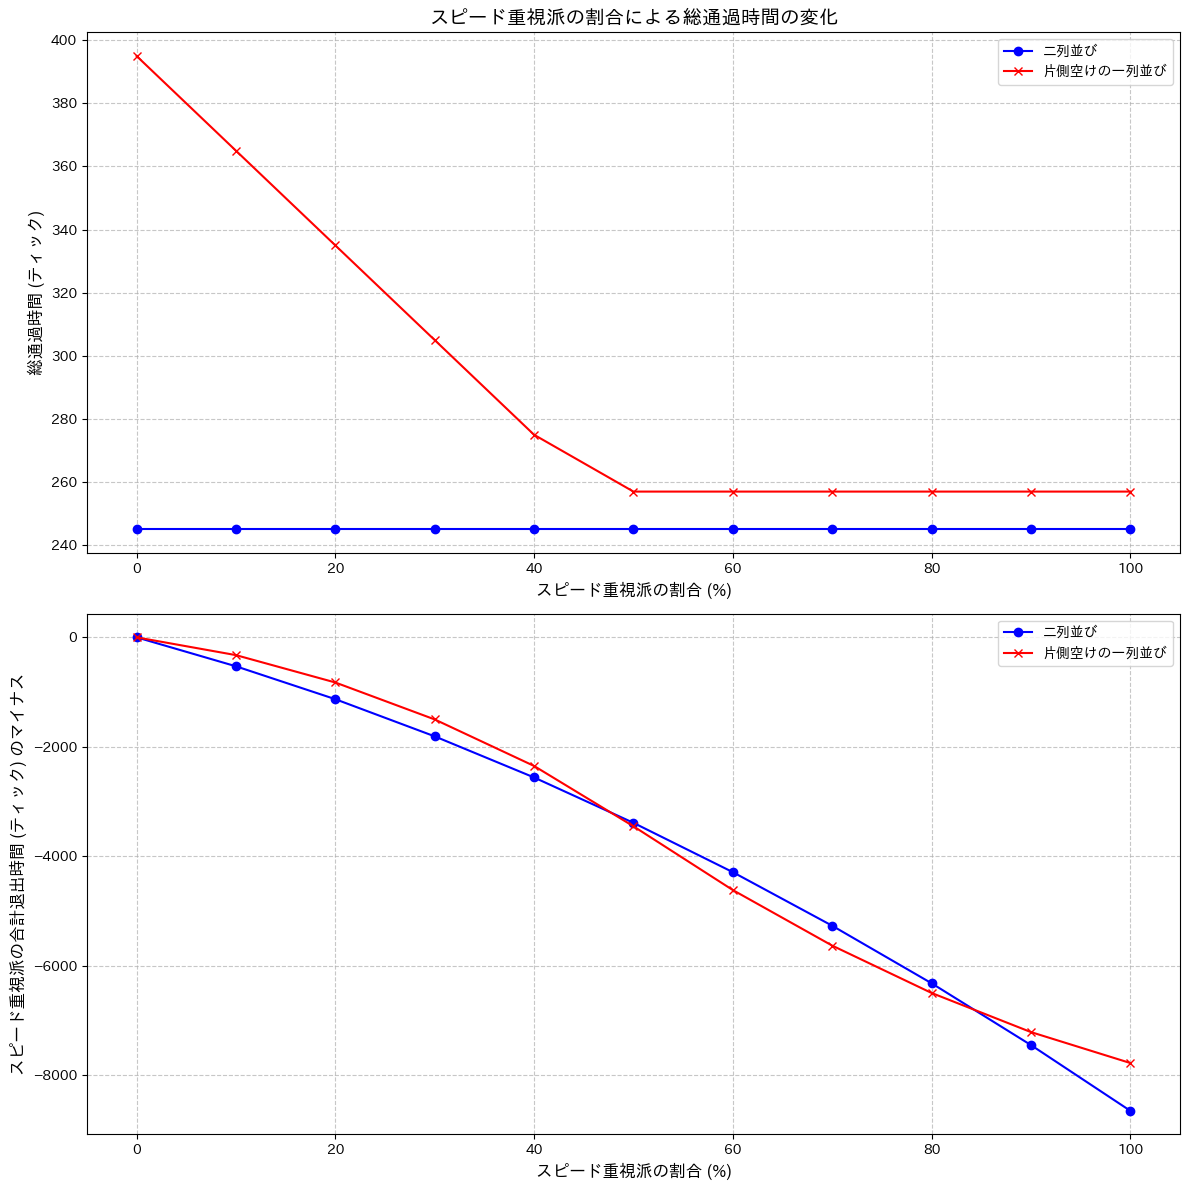


--- シミュレーション完了 ---
総人数: 50人
エスカレーターの長さ: 20ステップ
エスカレーターの速度: 0.2ステップ/ティック
歩行速度倍率: 2.0倍
立ち止まるレーンの乗車間隔: 5.0ティック
歩くレーンの乗車間隔: 15.0ティック (実効値: 7ティック)
各割合でのシミュレーション回数: 1回

**結果の概要**
「総通過時間の変化」グラフは、エスカレーターを全員が通過するまでにかかる時間の平均値を示します。
「スピード重視派の合計退出時間 (ティック) のマイナス」グラフは、全体満足度を示します。


In [4]:
WALKING_LANE_ENTRY_INTERVAL_TICKS = 3 / ESCALATOR_SPEED

# 複数シミュレーションを実行し、結果を収集
double_file_times, double_file_satisfactions, \
    single_file_times, single_file_satisfactions = \
    run_multiple_simulations_and_collect_results(
        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED, WALKING_SPEED_MULTIPLIER,
        NUM_SIMULATIONS_PER_PERCENTAGE, speed_focused_percentages,
        STANDING_LANE_ENTRY_INTERVAL_TICKS, WALKING_LANE_ENTRY_INTERVAL_TICKS
    )

# シミュレーション結果をプロット
plot_simulation_results(speed_focused_percentages, double_file_times,
                        double_file_satisfactions,
                        single_file_times, single_file_satisfactions,
                        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED,
                        WALKING_SPEED_MULTIPLIER,
                        NUM_SIMULATIONS_PER_PERCENTAGE,
                        STANDING_LANE_ENTRY_INTERVAL_TICKS,
                        WALKING_LANE_ENTRY_INTERVAL_TICKS)


この設定だと全体がはけるのは一列並びが早い場合はないことが示された。

全体満足度に関しても、高速レーンが埋まってスピードが出せないため、一列並びが負ける場合があることが示された。

こういったことは、安全マージンと(高速レーンを)歩くスピードに影響される。安全マージンが二段でも歩くスピードを遅く (例えば WALKING_SPEED_MULTIPLIER = 1.2 に) すれば、やはり、安全マージンを広くしたのと同じような(一列並びが負ける)結果になる。

なお、この設定では二列並びは、スピード重視派が必ず先に乗るという点で全体満足度に関して有利になりやすくなっている。これをやや不利に調整するため、スピード重視派か楽さ重視派かはランダム到着するものとしてみる。


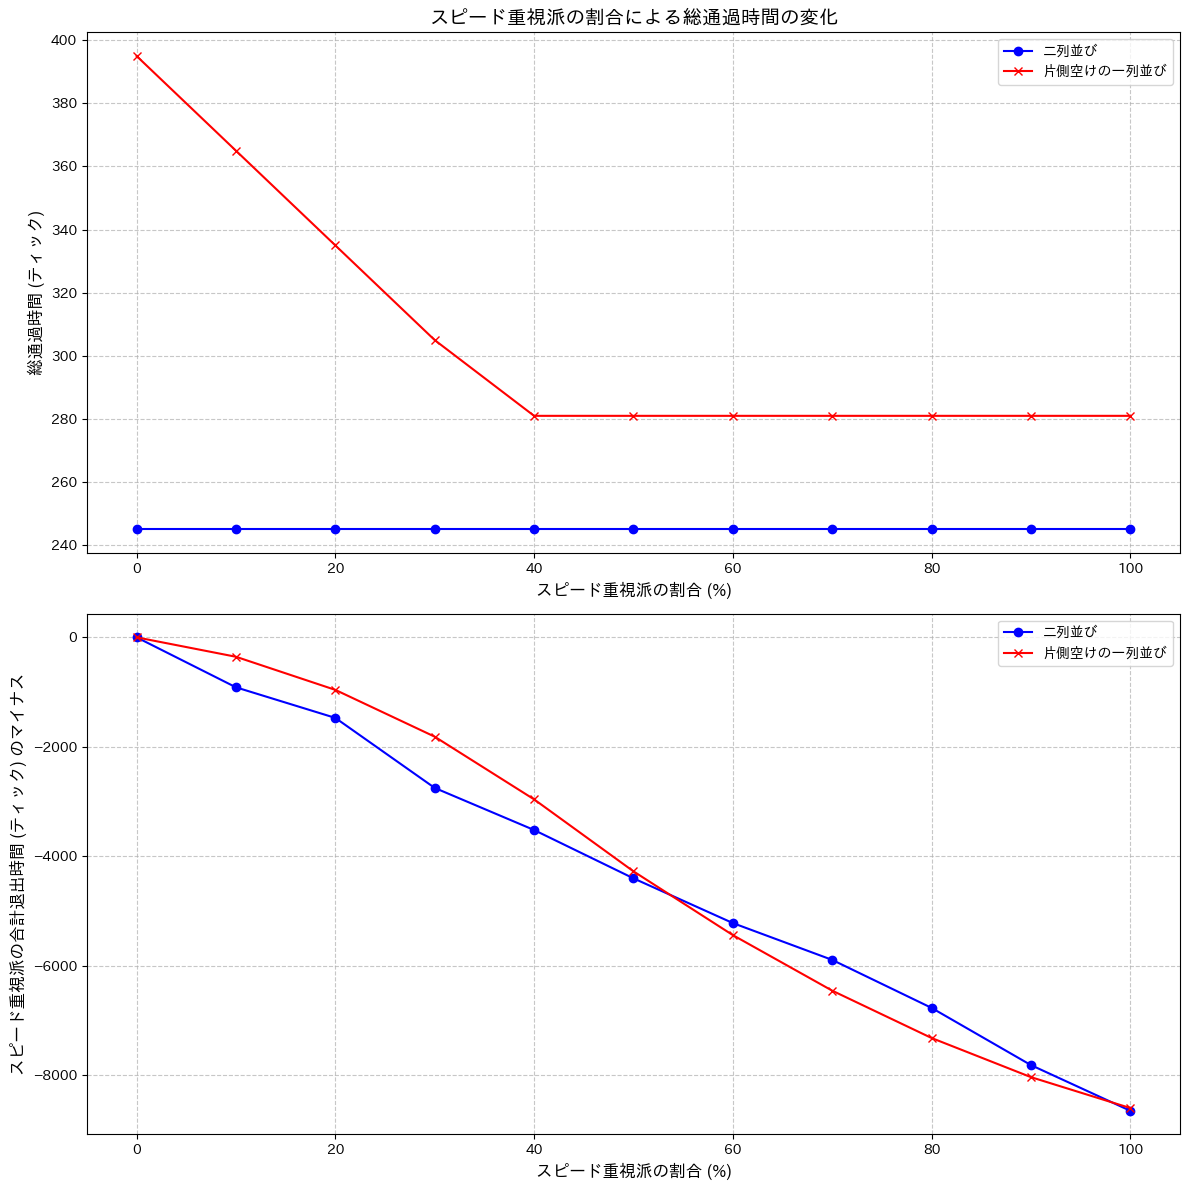


--- シミュレーション完了 ---
総人数: 50人
エスカレーターの長さ: 20ステップ
エスカレーターの速度: 0.2ステップ/ティック
歩行速度倍率: 2.0倍
立ち止まるレーンの乗車間隔: 5.0ティック
歩くレーンの乗車間隔: 20.0ティック (実効値: 10ティック)
各割合でのシミュレーション回数: 1回

**結果の概要**
「総通過時間の変化」グラフは、エスカレーターを全員が通過するまでにかかる時間の平均値を示します。
「スピード重視派の合計退出時間 (ティック) のマイナス」グラフは、全体満足度を示します。


In [5]:
def run_simulation(scenario_type, num_people, speed_focused_percentage,
                   escalator_length, escalator_speed, walking_speed_multiplier,
                   standing_lane_entry_interval_ticks,
                   walking_lane_entry_interval_ticks):
    """
    エスカレーターシミュレーションを実行するメイン関数
    :param scenario_type: 'double' (二列並び)
                          または 'single' (片側空けの一列並び)
    :param num_people: 総人数
    :param speed_focused_percentage: スピード重視派の割合 (%)
    :param escalator_length: エスカレーターの長さ (ステップ数)
    :param escalator_speed: エスカレーターの速度 (ステップ/ティック)
    :param walking_speed_multiplier: 歩行速度倍率
    :param comfort_satisfaction_weight:
        楽さ重視派の満足度が全体満足度に与える重み (0.0-1.0)
    :param standing_lane_entry_interval_ticks:
        立ち止まるレーンの乗車間隔 (ティック)
    :param walking_lane_entry_interval_ticks: 歩くレーンの乗車間隔 (ティック)
    :return: シミュレーション結果 (辞書)
    """
    # スピード重視派と楽さ重視派の人数を正確に計算
    # 端数は楽さ重視派で調整
    num_speed_focused = int(num_people * speed_focused_percentage / 100)
    num_comfort_focused = num_people - num_speed_focused

    people_list = [] # シミュレーション中の全人物を保持するリスト
    for i in range(num_speed_focused):
        people_list.append(Person(i, 'speed'))
    for i in range(num_speed_focused, num_people):
        people_list.append(Person(i, 'comfort'))
    # キューに入れる前にシャッフルして順序をランダムにする
    random.shuffle(people_list)

    # 人々のキューを初期化
    speed_queue = [p for p in people_list if p.type == 'speed']
    comfort_queue = [p for p in people_list if p.type == 'comfort']
    people_queue = [p for p in people_list]

    # エスカレーターのレーンを初期化 (Noneで空きを表す)
    # レーン0: 立ち止まる人 (または二列並び時の左レーン)
    # レーン1: 歩く人 (または二列並び時の右レーン)
    escalator = [
        [None] * escalator_length, # レーン0
        [None] * escalator_length  # レーン1
    ]

    time = 0 # 経過時間 (ティック数)
    exited_count = 0 # エスカレーターを降りた人数

    # 各レーンの最終乗車ティックを初期化 (初回はすぐに乗れるように負の無限大)
    last_board_tick_lane0 = -float('inf')
    last_board_tick_lane1 = -float('inf')

    # 結果を格納する辞書
    results = {
        'total_time': 0,
        'speed_walked': 0, # スピード重視派で歩けた人数 (片側空けのみ)
        'comfort_stood': 0, # 楽さ重視派で立ち止まれた人数 (片側空けのみ)
        'speed_used_comfort_lane_count': 0, # スピード重視派で、楽さ重視派"
                                            # レーンを使った人数 (片側空けのみ)
        'speed_waited': 0, # スピード重視派で、希望のレーンが空くのを待った回数
        'comfort_waited': 0, # 楽さ重視派で、希望のレーンが空くのを待った回数
        'overall_satisfaction': 0, # 新しい定義の全体満足度
        'total_speed_focused_people': num_speed_focused,
        'total_comfort_focused_people': num_comfort_focused
    }

    MAX_TICKS = 200000 # 無限ループ防止のための最大ティック数

    # 歩くレーンの実効乗車間隔を計算（歩行速度倍率によって短縮される）
    # ただし、最低1ティックは必要
    effective_walking_lane_entry_interval_ticks \
        = max(1, int(walking_lane_entry_interval_ticks
                     / walking_speed_multiplier))

    # 全員がエスカレーターを降りるか、
    # 最大ティック数に達するまでシミュレーションを続ける
    while exited_count < num_people and time < MAX_TICKS:
        time += 1 # 1ティック進める

        # 次のティックのエスカレーターの状態を初期化
        new_escalator_state = [
            [None] * escalator_length,
            [None] * escalator_length
        ]

        # 1. エスカレーター上の人々を移動させる
        # 移動を試みる人物のリストを作成 (元の位置も保持)
        # (person, original_lane, original_pos_idx)
        people_on_escalator_current_tick = []
        for l in range(2):
            for pos_idx in range(escalator_length):
                if escalator[l][pos_idx]:
                    people_on_escalator_current_tick.append(
                        (escalator[l][pos_idx], l, pos_idx)
                    )

        # エスカレーターの終点に近い人から優先して処理するためにソート
        # これにより、衝突が発生した場合、後ろの人が前の人の進路を妨げないようにする
        people_on_escalator_current_tick.sort(
            key=lambda x: x[0].current_position, reverse=True
        )

        for person, original_lane, original_pos_idx \
                in people_on_escalator_current_tick:
            # 移動速度を決定
            speed = escalator_speed
            # 片側空けで歩くレーン
            if scenario_type == 'single' and original_lane == 1:
                speed = escalator_speed * walking_speed_multiplier

            # 潜在的な新しい浮動小数点位置を計算
            potential_new_pos_float = person.current_position + speed

            # 終了条件の頑健な浮動小数点比較のためにイプシロンを使用
            if potential_new_pos_float >= escalator_length - 1e-9:
                # エスカレーターを降りた
                exited_count += 1
                person.exit_tick = time # 降りたティックを記録
                if scenario_type == 'single':
                    if person.type == 'speed' and original_lane == 1:
                        results['speed_walked'] += 1
                    elif person.type == 'comfort' and original_lane == 0:
                        results['comfort_stood'] += 1
            else:
                # 人が移動を試みる新しい整数ステップ
                target_int_pos = min(escalator_length - 1,
                                     int(potential_new_pos_float))

                # 目標位置が空の場合、その人を配置し、位置を更新
                if new_escalator_state[original_lane][target_int_pos] is None:
                    new_escalator_state[original_lane][target_int_pos] = person
                    person.current_position \
                        = potential_new_pos_float # 浮動小数点位置を更新
                else:
                    # 衝突: 目標位置が既に占有されている場合、その人は移動できない。
                    # その人は元の整数位置に留まる。
                    new_escalator_state[original_lane][original_pos_idx] \
                        = person

        # エスカレーターの状態を、正常に移動した人々で更新
        escalator = new_escalator_state

        # 2. 待機中の人々をエスカレーターに乗せる (起点0に配置)
        if scenario_type == 'double': # 二列並びの場合
            # レーン0に空きがあり、乗車間隔をクリアしている場合
            if escalator[0][0] is None \
               and (time - last_board_tick_lane0
                    >= standing_lane_entry_interval_ticks):
                if people_queue:
                    person = people_queue.pop(0)
                    escalator[0][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                    last_board_tick_lane0 = time # 最終乗車ティックを更新

            # レーン1に空きがあり、乗車間隔をクリアしている場合
            if escalator[1][0] is None \
               and (time - last_board_tick_lane1
                    >= standing_lane_entry_interval_ticks):
                # 二列並びでは両レーンとも立ち止まる間隔
                if people_queue:
                    person = people_queue.pop(0)
                    escalator[1][0] = person
                    person.current_position = 0.0 # 位置をリセット
                    person.entry_tick = time # 乗ったティックを記録
                    last_board_tick_lane1 = time # 最終乗車ティックを更新
        else: # 片側空けの一列並びの場合
            # このティックで各レーンに乗る人を決定
            person_for_lane0 = None
            person_for_lane1 = None

            # 優先度1: レーン0に楽さ重視派 (乗車間隔を考慮)
            if escalator[0][0] is None and comfort_queue \
               and (time - last_board_tick_lane0
                    >= standing_lane_entry_interval_ticks):
                person_for_lane0 = comfort_queue.pop(0)
                person_for_lane0.entry_tick = time # 乗ったティックを記録
                last_board_tick_lane0 = time # 最終乗車ティックを更新

            # 優先度2: レーン1にスピード重視派 (乗車間隔を考慮)
            if escalator[1][0] is None and speed_queue \
               and (time - last_board_tick_lane1
                    >= effective_walking_lane_entry_interval_ticks):
                person_for_lane1 = speed_queue.pop(0)
                person_for_lane1.entry_tick = time # 乗ったティックを記録
                last_board_tick_lane1 = time # 最終乗車ティックを更新

            # 優先度3: スピード重視派がレーン0にフォールバック
            # (乗車間隔と楽さ重視派のキューが空であることを考慮)
            # スピード重視派がまだ待機中で、かつ
            # レーン0がまだ空いており (このティックで楽さ重視派が
            # 乗車しなかった場合も含む)、かつ
            # 楽さ重視派のキューが完全に空になった後 (全員が乗り終えた後)、かつ
            # レーン0の乗車間隔もクリアしている場合
            if speed_queue and escalator[0][0] is None \
               and person_for_lane0 is None and not comfort_queue \
               and (time - last_board_tick_lane0
                    >= standing_lane_entry_interval_ticks):
                person_for_lane0 = speed_queue.pop(0)
                results['speed_used_comfort_lane_count'] += 1
                person_for_lane0.entry_tick = time # 乗ったティックを記録
                last_board_tick_lane0 = time # 最終乗車ティックを更新

            # 決定に基づいて乗車を実行
            if person_for_lane0:
                escalator[0][0] = person_for_lane0
                person_for_lane0.current_position = 0.0
            if person_for_lane1:
                escalator[1][0] = person_for_lane1
                person_for_lane1.current_position = 0.0

            # 待機中の人数をカウント
            # 各キューに残っている場合のみ待機中とみなす
            if speed_queue: # スピード重視派がまだキューに残っている場合
                results['speed_waited'] += 1
            if comfort_queue: # 楽さ重視派がまだキューに残っている場合
                results['comfort_waited'] += 1

    results['total_time'] = time # シミュレーションにかかった総ティック数

    if time >= MAX_TICKS:
        print(f"警告: シミュレーションが最大ティック数 ({MAX_TICKS}) に"
              + "達しましたが、全員がエスカレーターを降りていません。"
              + "デッドロックまたは非常に遅い進行の可能性があります。")

    # 全体満足度を計算 (スピード重視派の合計退出時間のマイナス)
    speed_focused_total_exit_time = 0
    for person in people_list:
        if person.type == 'speed' and person.exit_tick is not None:
            speed_focused_total_exit_time += person.exit_tick

    # 合計時間が短いほど「満足度が高い」ので、マイナス値で表現
    results['overall_satisfaction'] = -speed_focused_total_exit_time

    return results

WALKING_LANE_ENTRY_INTERVAL_TICKS =4 / ESCALATOR_SPEED

# 複数シミュレーションを実行し、結果を収集
double_file_times, double_file_satisfactions, \
    single_file_times, single_file_satisfactions = \
    run_multiple_simulations_and_collect_results(
        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED, WALKING_SPEED_MULTIPLIER,
        NUM_SIMULATIONS_PER_PERCENTAGE, speed_focused_percentages,
        STANDING_LANE_ENTRY_INTERVAL_TICKS, WALKING_LANE_ENTRY_INTERVAL_TICKS
    )

# シミュレーション結果をプロット
plot_simulation_results(speed_focused_percentages, double_file_times,
                        double_file_satisfactions,
                        single_file_times, single_file_satisfactions,
                        NUM_PEOPLE, ESCALATOR_LENGTH, ESCALATOR_SPEED,
                        WALKING_SPEED_MULTIPLIER,
                        NUM_SIMULATIONS_PER_PERCENTAGE,
                        STANDING_LANE_ENTRY_INTERVAL_TICKS,
                        WALKING_LANE_ENTRY_INTERVAL_TICKS)


このようなプログラムでも、やはり一列並びが全体満足度でも負ける例が出てくる。上では、安全マージンが 3段 のままでは、一列並びが勝つようになってしまったので、安全マージンを 4段にしている。

一列並びはもう少し最適化できる余地はある。上では二列並びをランダム配置にしたが、そうではなく、一列並びにおいて、非高速レーンに楽さ重視派のあとスピード重視派が乗る状況になりうるのだが、すべてが終ってから、先にそのスピード重視派が乗っていた…みたいなズルをするような最適化もできる。すると、多少、一列並びが有利になるだろう。また、非高速レーンに乗ったスピード重視派が高速レーンが空くごとにそちらに乗り換えるようなことをすればさらに一列並びが有利になると思われる。

しかし、それもパラメータでどうとでもなるレベルで、大勢を変えるような変更にはならないと私は思う。興味のある方は、ご自身でお確かめになるのが吉である。他者向けの今後の課題としたい。
